In [45]:
# 분류(확률) :  로지스틱 회귀
# 회귀(예측) : 선형회귀

In [46]:
# from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항 feature를 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib

# maplotlib.rcParams['font.family'] = 'AppleGothic Gothic   # Mac 사용자
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = '10'  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

무게, 길이, 대각선, 높이, 너비 - 어떤 물고기인지 분류하는 모델을 구현

도미 - bream, 빙어 - smelt

In [47]:
df = pd.read_csv('https://bit.ly/fish_csv_data')
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [48]:
# 데이터 확인
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [49]:
df.shape

(159, 6)

In [50]:
df.iloc[40:42]

,Species,Weight,Length,Diagonal,Height,Width
40,Roach,0.0,20.5,22.8,6.4752,3.3516
41,Roach,110.0,20.8,23.1,6.1677,3.3957


In [51]:
df['Weight'].sort_values()

40        0.0
72        5.9
145       6.7
147       7.0
146       7.5
        ...  
125    1100.0
141    1250.0
143    1550.0
142    1600.0
144    1650.0
Name: Weight, Length: 159, dtype: float64

In [52]:
# 정답으로 분류하는 물고기는 7종류
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [53]:
# 어류별 개수 -> train, test 세트를 나눌 때 골고루 섞이게끔 해야한다
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [54]:
# 데이터 전처리
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [55]:
df.iloc[:,1:].head()  # Species를 제외한 모든 컬럼

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [56]:
# 데이터 전처리 - data,target 세트 분리
fish_data = df.iloc[:,1:].to_numpy()
fish_target = df['Species'].to_numpy()

In [57]:
# 데이터 전처리 - train, test 세트 분리
train_input,test_input,train_target,test_target = train_test_split(
    fish_data,fish_target,random_state=42 )

In [58]:
# 데이터 학습 시키기
# 데이터 예측하기
# 데이터 예측 정확도 구하기 

In [62]:
# knn 모델을 적용
# 1. 표준화 작업
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [68]:
# 2. 최근접 이웃 분류기의 확률 예측
# from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)  # 과소적합 방지, n_neighbors=3 준수한 정확도
kn.fit(train_scaled,train_target)

# 3. 예측 정확도 구하기
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

0.8907563025210085
0.85


In [71]:
# target에 있는 속성 개수 : 7개
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [69]:
# 4. 데이터 예측하기 (일부)
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [75]:
# kn.classes_ 속성 순서대로 이 모델이 계산한 확률이 가장 가까운 이웃의 비율
# predict_proba : 각 특성별로 분류 퍼센트를 출력
# ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))   # 소수점 4번째 자리까지 표시

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [78]:
# n_neighbors 의 주소값 입력
# 네 번째 샘플의 최근접 이웃 클래스 확인
distances, indexes = kn.kneighbors(test_scaled[3:4])  # test_scaled[3] 은 1차원배열이라 오류
print(train_target[indexes])

# [['Roach' 'Perch' 'Perch']]
# 1/3 = 0.3333(Roach), 2/3 = 0.6667(Perch)

[['Roach' 'Perch' 'Perch']]


로지스틱 회귀(보다 더 나은 확률 표시)

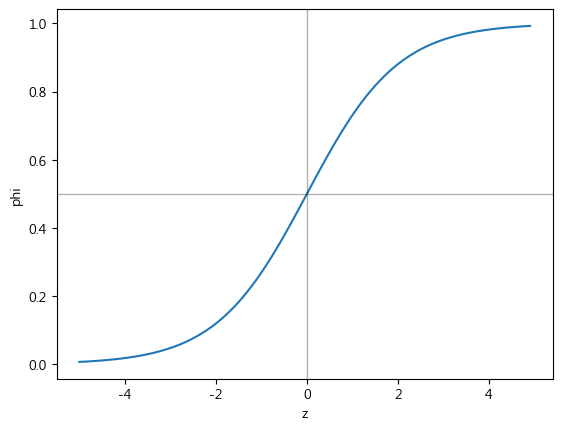

In [89]:
# 로지스틱 회귀
# z = a*(Weight) + b*(Length) + c*(Diagonal) + d*(Height) + e*(Width) + f
# 시그모이드 함수를 사용하여 시그모이드 그래프를 그린다.
# 시그모이드 함수 = 1 / (1 + np.exp(-z))

z = np.arange(-5,5,0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.axhline(y=0.5,color='black',alpha=0.3,linewidth=1)
plt.axvline(x=0,color='black',alpha=0.3,linewidth=1)
plt.show()

In [81]:
# 이진 분류일 경우, 시그모이드 함수의 출력이 0.5보다 크면 양성 클래스
# 0.5보다 작으면 음성 클래스로 판단 (scikit-learn은 0.5일때 음성 클래스로 판단함)

In [91]:
# 로지스틱 회귀로 이진 분류
char_arr =np.array(['A','B','C','D','A','B','C'])
# A,C 이외 데이터는 False
char_arr[[True,False,True,False,True,False,True]]

array(['A', 'C', 'A', 'C'], dtype='<U1')

In [105]:
# 이진분류형태, 다항분류형태로 해서 분류모델을 적용 시켜봄
bs_df = df[(df['Species']=='Bream') | (df['Species']=='Smelt')]

#### LogisticRegression 모델을 적용해서 예측 정확도를 출력하시오

In [118]:
bs_data = bs_df.iloc[:,1:].to_numpy()
bs_target = bs_df['Species'].to_numpy()

# bs_data

In [140]:
# 1. 데이터 전처리
train_input,test_input,train_target,test_target = train_test_split(
    bs_data, bs_target, random_state=42
)

In [143]:
# 2. 표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)  # 데이터 훈련
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [144]:
# 3. 로지스틱 회귀 모델 ->  예측 정확도 계산
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

1.0
1.0


In [146]:
print(lr.predict(train_scaled[:5]))

['Bream' 'Bream' 'Bream' 'Smelt' 'Smelt']


In [148]:
print(lr.classes_)

['Bream' 'Smelt']


In [150]:
# ['Bream' 'Smelt'] 속성 순서 
print(lr.predict_proba(train_scaled[:5]))

[[0.97781589 0.02218411]
 [0.95701776 0.04298224]
 [0.98230024 0.01769976]
 [0.04076162 0.95923838]
 [0.04518953 0.95481047]]


In [153]:
# 로지스틱 회귀 - 선을 가지고 있음, 기울기, y절편
print(lr.coef_, lr.intercept_)

[[-0.57717269 -0.79233938 -0.82533982 -0.86579233 -0.82205625]] [-2.38186126]


z = a*(Weight) + b*(Length) + c*(Diagonal) + d*(Height) + e*(Width) + f

In [158]:
train_scaled[0]

array([0.09920189, 0.37460577, 0.41303385, 0.46524998, 0.37261369])

In [160]:
z = -0.57717269*0.09920189 - 0.79233938*0.37460577 - 0.82533982*0.41303385 - 0.86579233* 0.46524998 - 0.82205625*0.37261369 - 2.38186126
z

-3.7859453455802297

In [161]:
decisions = lr.decision_function(train_scaled[:5])
print(decisions)

[-3.78594535 -3.10303503 -4.01634616  3.15839875  3.0506475 ]


In [164]:
from scipy.special import expit

# 시그모이드 함수를 적용 # predict_proba() 메서트 출력의 2번째 열의 값과 동일
print(expit(decisions))

# ['Bream' 'Bream' 'Bream' 'Smelt' 'Smelt']
# [0.02218411 0.04298224 0.01769976 0.95923838 0.95481047]
# Bream : 음성 클래스, Smelt : 양성 클래스

[0.02218411 0.04298224 0.01769976 0.95923838 0.95481047]
